In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from upload.upload_sim_res import delete_from_gcs, download_from_gcs, upload_to_gcs, list_blob_names

import dill
import os

from analyze.report import draw_spikes_pop, draw_rate_vs_angle_pop, draw_rate_vs_angle
from analyze.report import calculate_vector_strength_from_result, calculate_vector_strength_from_result_polar


/mnt/c/Users/utente/Desktop/repos/hears_env/lib/python3.12/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


In [2]:
list_blob_names()

0: Name: /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1_no_MSO_inh.pic, Size: 1921929992, Updated: 2025-03-28 13:32:10.891000+00:00
1: Name: /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_2.pic, Size: 1924618088, Updated: 2025-03-26 14:06:21.526000+00:00
2: Name: /home/ubuntu/polithesis/results/angles2rates/tone_1.1kHz_70dB&TanCarney&subject_1.pic, Size: 2307892186, Updated: 2025-04-01 06:46:37.329000+00:00
3: Name: /home/ubuntu/polithesis/results/angles2rates/tone_1.2kHz_70dB&TanCarney&subject_1.pic, Size: 2248438344, Updated: 2025-04-01 11:08:43.191000+00:00
4: Name: /home/ubuntu/polithesis/results/angles2rates/tone_1.3kHz_70dB&TanCarney&subject_1.pic, Size: 2229962490, Updated: 2025-04-01 15:33:48.210000+00:00
5: Name: /home/ubuntu/polithesis/results/angles2rates/tone_1.4kHz_70dB&TanCarney&subject_1.pic, Size: 2221971370, Updated: 2025-04-01 20:01:50.112000+00:00
6: Name: /home/ubuntu/polithesis/results/angles2rat

In [3]:
# List directory contents
result_dir = '/mnt/c/Users/utente/OneDrive - Politecnico di Milano/work/sl_results/'
items = os.listdir(result_dir)
for item in items:
    print(item) 


tone_0.1kHz_70dB&TanCarney&ild_only.pic
tone_0.1kHz_70dB&TanCarney&itd_only.pic
tone_0.1kHz_70dB&TanCarney&itd_only_no_MSO_inh.pic
tone_0.1kHz_70dB&TanCarney&subject_1.pic
tone_0.1kHz_70dB&TanCarney&subject_1_no_MSO_inh.pic
tone_0.1kHz_70dB&TanCarney&subject_2.pic
tone_0.4kHz_70dB&TanCarney&subject_1.pic
tone_0.5kHz_70dB&TanCarney&subject_1.pic
tone_0.6kHz_70dB&TanCarney&subject_1.pic
tone_0.7kHz_70dB&TanCarney&subject_1.pic
tone_0.8kHz_70dB&TanCarney&subject_1.pic
tone_0.9kHz_70dB&TanCarney&subject_1.pic
tone_1.1kHz_70dB&TanCarney&subject_1.pic
tone_1.2kHz_70dB&TanCarney&subject_1.pic
tone_1.3kHz_70dB&TanCarney&subject_1.pic
tone_1.4kHz_70dB&TanCarney&subject_1.pic
tone_1.kHz_70dB&TanCarney&ild_only.pic
tone_1.kHz_70dB&TanCarney&itd_only.pic
tone_1.kHz_70dB&TanCarney&itd_only_myoga_inv.pic
tone_1.kHz_70dB&TanCarney&itd_only_myoga_null.pic
tone_1.kHz_70dB&TanCarney&itd_only_no_MSO_inh.pic
tone_1.kHz_70dB&TanCarney&subject_1.pic
tone_1.kHz_70dB&TanCarney&subject_1_myoga_inv.pic


In [ ]:
title = 'tone_0.1kHz_70dB&TanCarney&subject_1.pic'
result_path = result_dir + title
with open(result_path, "rb") as f:
    r = dill.load(f, ignore=True)

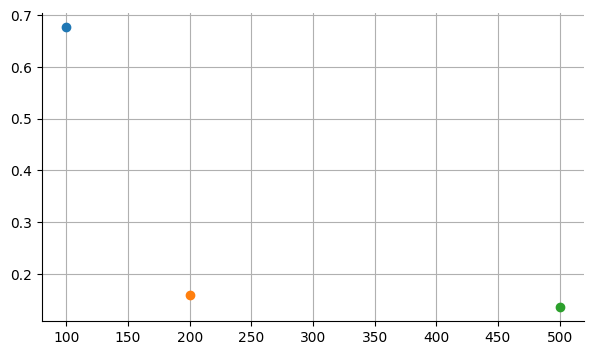

In [12]:
fig, ax = plt.subplots(1, figsize = (7,4))
for x in [100,200,500]:
    vs = calculate_vector_strength_from_result(r, 0, 'L', 'ANF', cf_target = x)
    ax.plot(x, vs, 'o-')

In [18]:
import tqdm

In [ ]:
# Uncomment all frequencies
freqs = [0.1, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
x_ax = np.arange(20,1500)
vs_data = np.zeros((len(freqs), len(x_ax)))  # Store results in numpy array for easier plotting

# Process each frequency
for i, freq in enumerate(freqs):
    # Create filename
    title = f'tone_{freq}kHz_70dB&TanCarney&subject_1.pic'
    result_path = result_dir + title
    
    # Load data once per frequency
    with open(result_path, "rb") as file:
        result = dill.load(file, ignore=True)
    
    # Process each CF target for this frequency
    for j, x in tqdm(enumerate(x_ax)):
        vs_data[i, j] = calculate_vector_strength_from_result(result, 0, 'L', 'ANF', cf_target=x)
    print(f"Frequency: {freq}kHz, CF target: {x}, Vector Strength: {vs_data[i, j]}")

KeyboardInterrupt: 

7it [00:00, 855.88it/s]


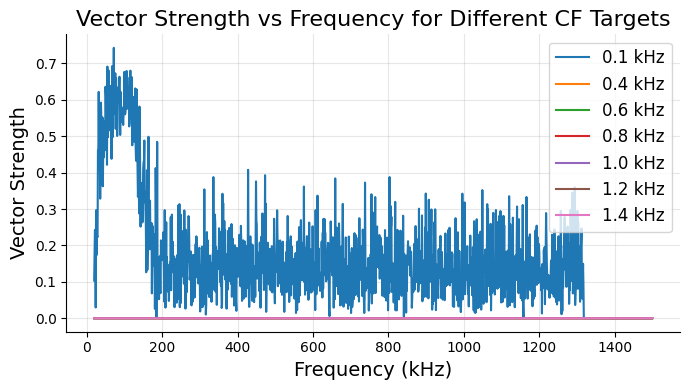

In [20]:
fig, ax = plt.subplots(figsize = (7,4))
for i, freq in tqdm.tqdm(enumerate(freqs)):
    ax.plot(x_ax, vs_data[i], label=f'{freq} kHz')

ax.set_xlabel('Frequency (kHz)', fontsize=14)
ax.set_ylabel('Vector Strength', fontsize=14)
ax.set_title('Vector Strength vs Frequency for Different CF Targets', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
fig.tight_layout()

In [13]:
from analyze.report import draw_spikes_pop

[20.         20.62650933 21.25459607 21.88426421 22.51551772 23.1483606
 23.78279684 24.41883046 25.05646548 25.69570593] Hz
(119001, 119002, 119003, 119004, 119005, 119006, 119007, 119008, 119009, 119010)


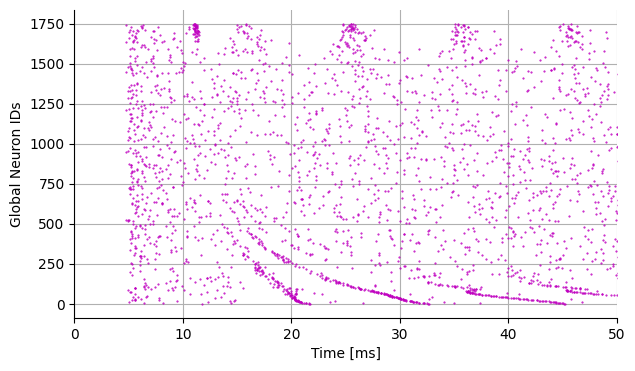

In [18]:
draw_spikes_pop(
    res = r,
    angle = 0,
    side = 'L',
    pop = 'MSO',
    y_ax = 'global_ids',
    xlim = [0,50]
)

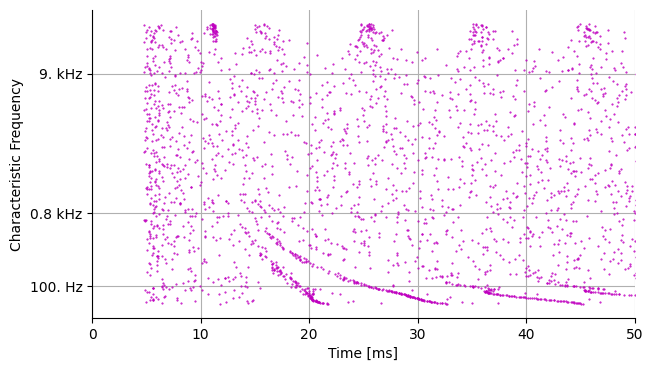

In [33]:
draw_spikes_pop(
    res = r,
    angle = 0,
    side = 'L',
    pop = 'MSO',
    y_ax = 'cf_custom',
    xlim = [0,50],
    f_ticks = [100,1000,10000]
)

simulation time=1. s


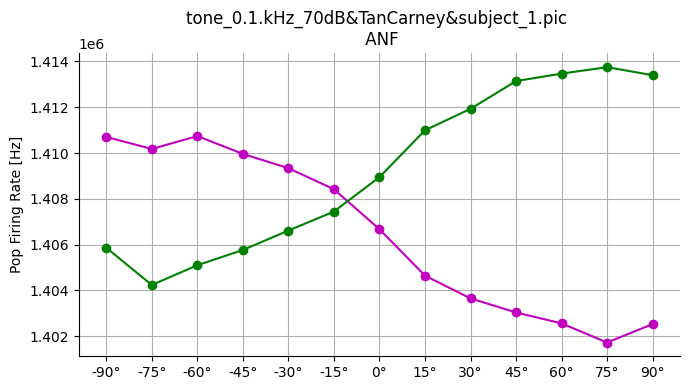

In [9]:
draw_rate_vs_angle_pop(
    r,
    title,
    rate=False,
    mode = 'default',
    hist_logscale=True,
    pop = "ANF",
    show_hist=False
)

simulation time=1. s


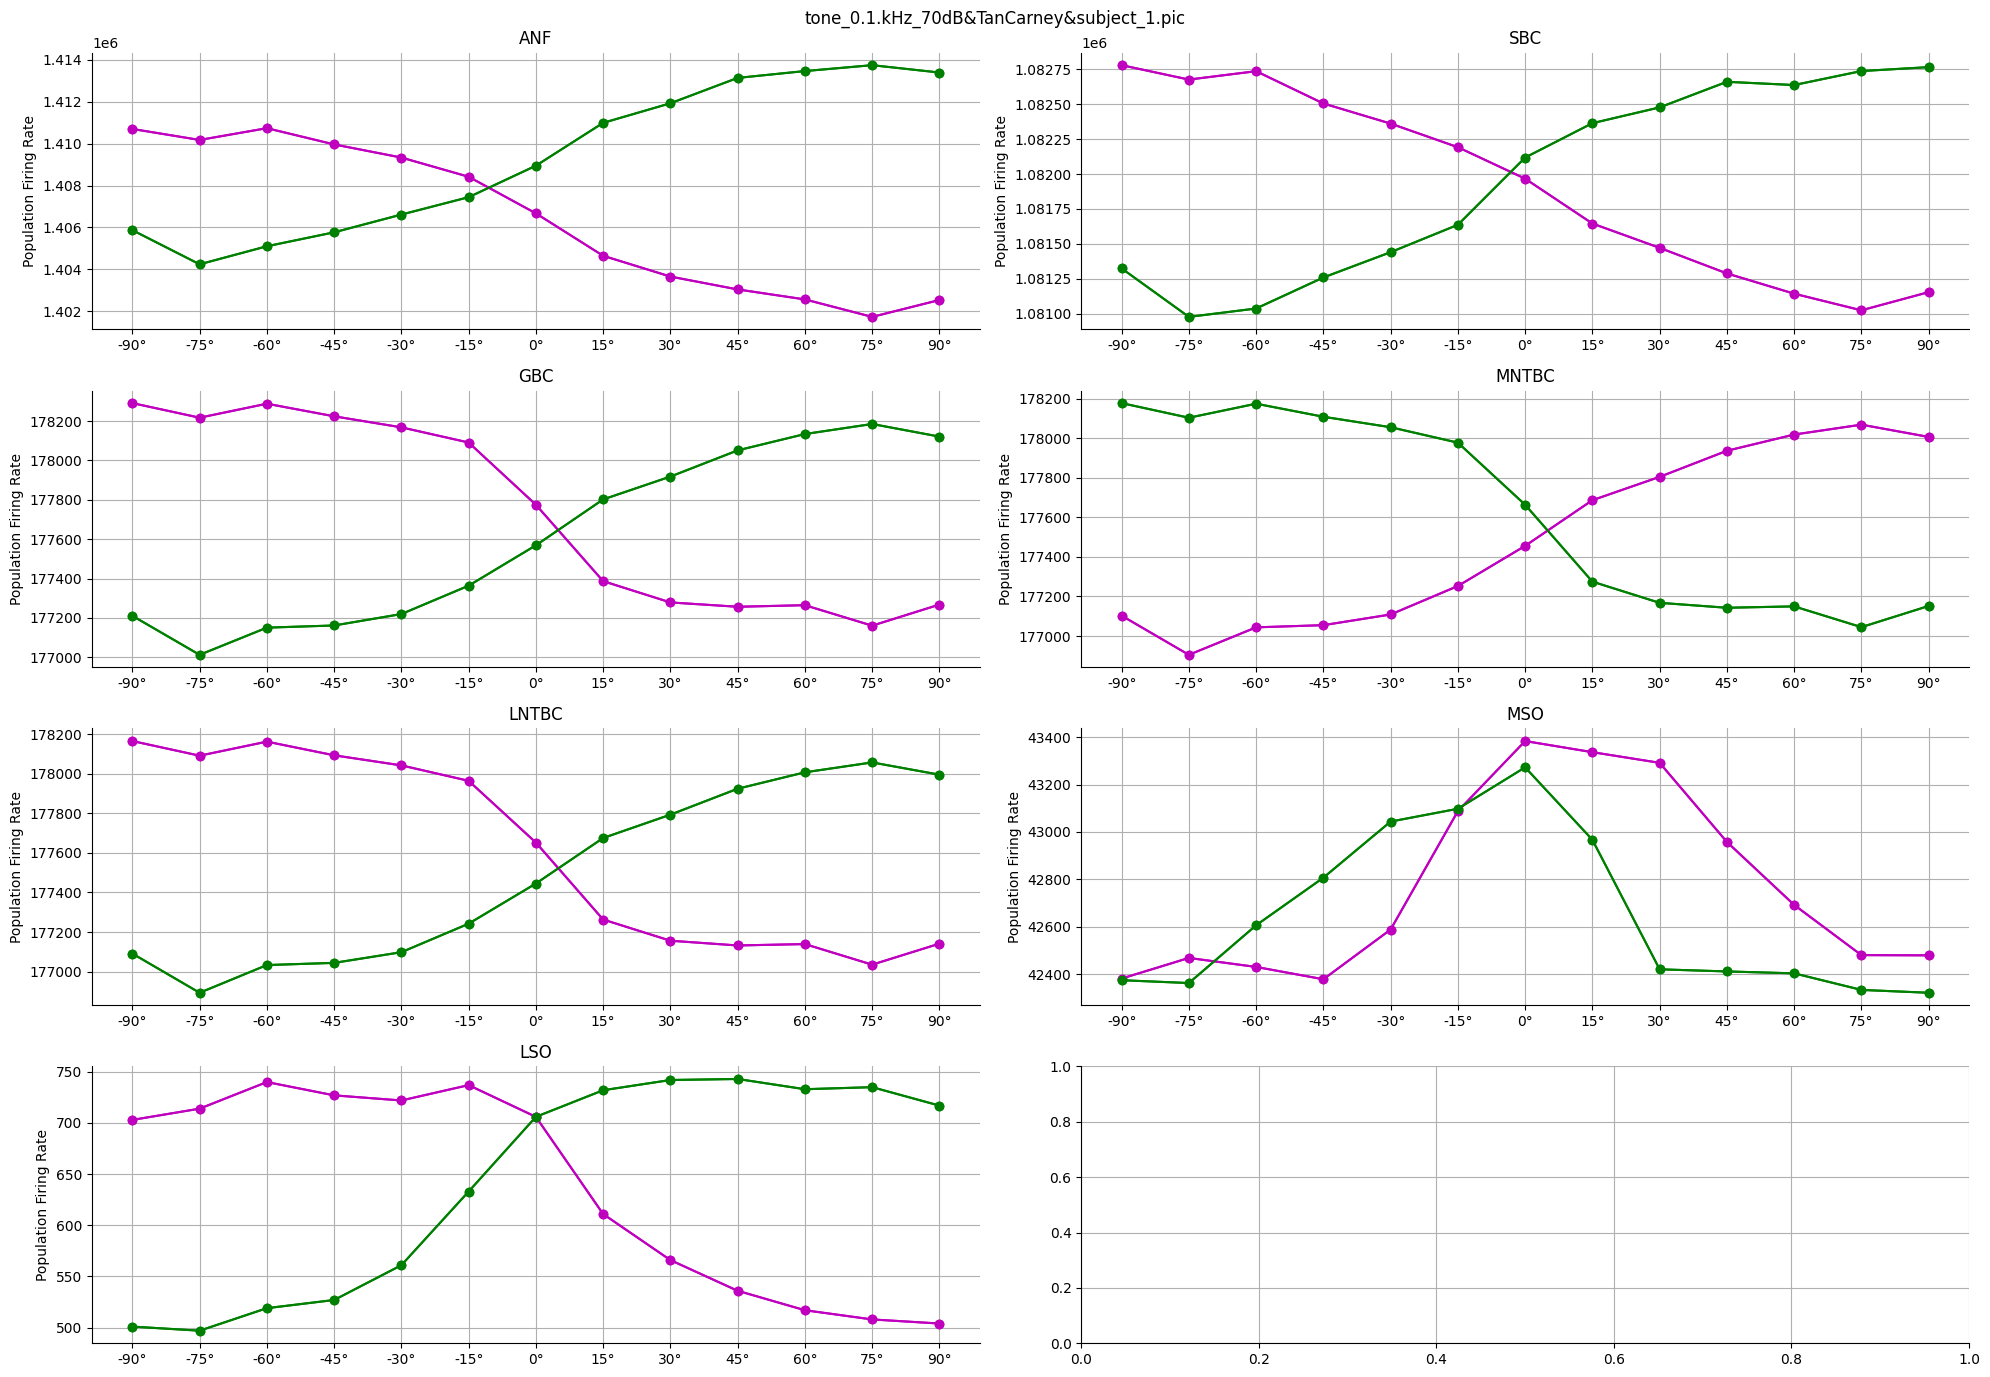

In [8]:
draw_rate_vs_angle(
    r,
    title,
    rate=False,
    mode = 'default',
    hist_logscale=True,
    show_pops = ['ANF', 'SBC', 'GBC', 'MNTBC', 'LNTBC', 'MSO', 'LSO'],
    show_hist=False
)

In [ ]:
draw_rate_vs_angle(
    r,
    title,
    rate=False,
    mode = 'default',
    hist_logscale=True,
    show_pops = ['parrot_ANF', 'SBC', 'GBC', 'MNTBC', 'LNTBC', 'MSO', 'LSO'],
    show_hist=False
)